# <font color='blue'>Telecom Churn Case Study</font>
* Institution: IIIT, Bangalore and UpGrad
* Course: PG Diploma in Machine Lerning and AI March 2018
* Date: 13-Aug-2018
* Submitted by:
    1. Pandinath Siddineni (ID- APFE187000194)
    2. AKNR Chandra Sekhar (ID- APFE187000315)
    3. Brajesh Kumar       (ID- APFE187000149)
    4. Shweta Tiwari


### <font color='blue'>Business Goals:</font>
1. Retaining high profitable customers is the number one business goal.
2. This project is based on the Indian and Southeast Asian market.
3. In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.
4. The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

### <font color='blue'>Analysis Goals:</font>
1. Predict which customers are at high risk of churn
2. Build predictive models to identify customers at high risk of churn and identify the main indicators of churn.
3. Prepaid is the most common model in India and southeast Asia. Focus on prepaid customers.
3. Curn definition used-- "Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time." In this project, we will use the usage-based definition to define churn.
4. In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.
5. especially high-value customers go through  three phases of customer lifecycle: a. The ‘good’ phase, b. The ‘action’ phase, c. The ‘churn’ phase
---------------------------

# <font color='blue'>PART 1: DATA UNDERSTANDING AND CLEANING</font>

1. Understand the properties of loaded dataframe
2. Idnetify Uniquness key
3. Identify bad colums that has no infromation (all entries are null or same)
4. Conver dates to meaningful number of days
5. Remove columns with data that does not make much sense for our analysis
6. Missing value treatment: replace with '0', mean or median; drop rows; drop columns
7. Outlier Treatment
8. Write data into a clean data file. This will be used to create master-df for analysis

#### <font color='red'>TODO: Compute Loss of data at each cleaning step</font>

In [49]:
# Import required libraries
import numpy as np
import pandas as pd

# Until fuction: line seperator
def print_ln():
    print('-'*80, '\n')
    
pd.options.display.float_format = '{:.2f}'.format

# Load csv data file
telecom = pd.read_csv('E:\IIIT Bangalore AIML\Group Assignment 2\\telecom_churn_data.csv', low_memory=False)

In [50]:
telecom.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

In [51]:
# Understand the properties of loaded dataframe
print('Dataframe Shape: ', telecom.shape); print_ln();
print("Dataframe Info: \n"); telecom.info(); print_ln();
telecom.head(5)

Dataframe Shape:  (99999, 226)
-------------------------------------------------------------------------------- 

Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
-------------------------------------------------------------------------------- 



,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,...,0,1.00,1.00,1.00,nan,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.05,...,0,nan,1.00,1.00,nan,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.69,...,0,nan,nan,nan,1.00,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.34,...,0,nan,nan,nan,nan,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.64,...,0,0.00,nan,nan,nan,1526,0.00,0.00,0.00,0.00


## Filter high-value customers

In [52]:
# Average of Total recharge amount (voice) and Total recharge amount (data) for the month of June and July is calculated
# From this data, records that have average value greater than or equal to 70th percentile value are selected

In [53]:
# First treat missing values in total reacharge data. This contains total number of times data recharged (both 2g, 3g) in a month 

telecom.total_rech_data_6.fillna(value=0, inplace=True)
telecom.total_rech_data_7.fillna(value=0, inplace=True)
telecom.total_rech_data_8.fillna(value=0, inplace=True)

telecom.av_rech_amt_data_6.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_7.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_8.fillna(value=0, inplace=True)

# Create a new column calculated by multiplying total reacharge data (number of data recharges) and average recharge amount.

telecom["total_rech_data_amt_6"] = telecom["total_rech_data_6"]*telecom['av_rech_amt_data_6']
telecom["total_rech_data_amt_7"] = telecom["total_rech_data_7"]*telecom['av_rech_amt_data_7']
telecom["total_rech_data_amt_8"] = telecom["total_rech_data_8"]*telecom['av_rech_amt_data_8']


In [54]:
# Filter high-value customers by taking average of total reacharge amount (voice) and total recharge amount (data) for June and July
total_rech_amt_6_7 = (telecom["total_rech_amt_6"] + telecom["total_rech_amt_7"] + telecom["total_rech_data_amt_6"] + telecom["total_rech_data_amt_7"]) /2.0

# Calculate 70 percentile
amont_70_pc = np.percentile(total_rech_amt_6_7, 70.0)
print('70 percentile of first two months avg recharge amount: ', amont_70_pc); print_ln();

70 percentile of first two months avg recharge amount:  478.0
-------------------------------------------------------------------------------- 



In [55]:
# Filter customers above 70th percentile
telecom1 = telecom[total_rech_amt_6_7 >= amont_70_pc]
print('Dataframe Shape: ', telecom1.shape); print_ln();

Dataframe Shape:  (30001, 229)
-------------------------------------------------------------------------------- 



## Fix Dates & convert to meaningful numbers
1. Convert date_of_last_rech_6 --> rech_b4_days_to_month_end_6 (voice rechanrged before number of days to month end)
2. convert date_of_last_rech_data_6 --> rech_b4_days_to_month_end_data_6 (data rechanrged before number of days to month end)

In [56]:
# covert date columns to python datetime format
date_columns = ["last_date_of_month_6", "last_date_of_month_7", "last_date_of_month_8", 
 "date_of_last_rech_6",  "date_of_last_rech_7", "date_of_last_rech_8", 
 "date_of_last_rech_data_6", "date_of_last_rech_data_7",  "date_of_last_rech_data_8"]
print(telecom1[date_columns].head()); print_ln();

# convert to datetime
for col in date_columns:
    telecom1[col] = pd.to_datetime(telecom1[col])

print(telecom1[date_columns].head()); print_ln();
print(telecom1[date_columns].info()); print_ln();

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
23            6/30/2014            7/31/2014            8/31/2014   

   date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0            6/21/2014           7/16/2014            8/8/2014   
7            6/27/2014           7/25/2014           8/26/2014   
8            6/25/2014           7/31/2014           8/30/2014   
21           6/30/2014           7/31/2014           8/31/2014   
23           6/18/2014            7/7/2014           8/24/2014   

   date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  
0                 6/21/2014                7/16/2014                 8/8/2014  
7                       NaN 

E:\Users\Aknrcsekhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            2014-06-30           2014-07-31           2014-08-31   
7            2014-06-30           2014-07-31           2014-08-31   
8            2014-06-30           2014-07-31           2014-08-31   
21           2014-06-30           2014-07-31           2014-08-31   
23           2014-06-30           2014-07-31           2014-08-31   

   date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
0           2014-06-21          2014-07-16          2014-08-08   
7           2014-06-27          2014-07-25          2014-08-26   
8           2014-06-25          2014-07-31          2014-08-30   
21          2014-06-30          2014-07-31          2014-08-31   
23          2014-06-18          2014-07-07          2014-08-24   

   date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8  
0                2014-06-21               2014-07-16               2014-08-08  
7                       NaT 

In [57]:
# Drop all old date columns: add dates columns to drop_column list
drop_columns = date_columns

In [58]:
# Create new days columns, instead of date

telecom1["rech_days_left_6"]      = (telecom1.last_date_of_month_6 - telecom1.date_of_last_rech_6).astype('timedelta64[D]')
telecom1["rech_days_left_data_6"] = (telecom1.last_date_of_month_6 - telecom1.date_of_last_rech_data_6).astype('timedelta64[D]')
telecom1["rech_days_left_7"]      = (telecom1.last_date_of_month_7 - telecom1.date_of_last_rech_7).astype('timedelta64[D]')
telecom1["rech_days_left_data_7"] = (telecom1.last_date_of_month_7 - telecom1.date_of_last_rech_data_7).astype('timedelta64[D]')
telecom1["rech_days_left_8"]      = (telecom1.last_date_of_month_8 - telecom1.date_of_last_rech_8).astype('timedelta64[D]')
telecom1["rech_days_left_data_8"] = (telecom1.last_date_of_month_8 - telecom1.date_of_last_rech_data_8).astype('timedelta64[D]')

day_columns = ["rech_days_left_6", "rech_days_left_data_6", "rech_days_left_7", "rech_days_left_data_7", "rech_days_left_8", "rech_days_left_data_8"]
#print(telecom[day_columns].head(10))
print(telecom1[day_columns].info())

E:\Users\Aknrcsekhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Users\Aknrcsekhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
E:\Users\Aknrcsekhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 6 columns):
rech_days_left_6         29928 non-null float64
rech_days_left_data_6    16756 non-null float64
rech_days_left_7         29903 non-null float64
rech_days_left_data_7    17057 non-null float64
rech_days_left_8         29418 non-null float64
rech_days_left_data_8    15953 non-null float64
dtypes: float64(6)
memory usage: 2.9 MB
None


E:\Users\Aknrcsekhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Users\Aknrcsekhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
E:\Users\Aknrcsekhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

## Tag churners and remove attributes of the churn phase

In [59]:
# Identify Churn
X = telecom1["total_ic_mou_9"] + telecom1["total_og_mou_9"] + telecom1["vol_2g_mb_9"] + telecom1["vol_3g_mb_9"]
telecom1["churn"] = np.where(X, 0, 1)

# Columns to be dropped: all columns ending with "_9"
drop_columns += [hdr for hdr in list(telecom) if hdr.endswith("_9")]
print('Total number of columns to drop  = ', len(set(drop_columns))); print_ln()

Total number of columns to drop  =  63
-------------------------------------------------------------------------------- 



E:\Users\Aknrcsekhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Identify columns that have no varience & Drop

In [60]:
# Identify columns that have no varience
telecom_unique_count = telecom1.nunique().sort_values(ascending=False)
#print("Dataframe Unique Values: \n", telecom_unique_count); print_ln()

# Identify bad colums that has no infromation (all entries are NA or same)
# Find columns with all NULL entries and add to drop_columns list
telecom_unique_count_is_zero = telecom_unique_count[telecom_unique_count == 0]
print("Dataframe Unique Value Count is ZERO (all null values): \n", telecom_unique_count_is_zero); print_ln();
drop_columns += list(telecom_unique_count_is_zero.index)

# Find columns with all same entries and add to drop_columns list
telecom_unique_count_is_one = telecom_unique_count[telecom_unique_count == 1]
print("Dataframe Unique Value Count is ONE (all same values): \n", telecom_unique_count_is_one); print_ln();
drop_columns += list(telecom_unique_count_is_one.index)

# #Don't drop columns used for caluculations ["last_date_of_month_6", "last_date_of_month_7","last_date_of_month_8"]
# drop_columns -= ["last_date_of_month_6", "last_date_of_month_7","last_date_of_month_8"]

print('Number of columns to drop  = ', len(set(drop_columns)))

Dataframe Unique Value Count is ZERO (all null values): 
 Series([], dtype: int64)
-------------------------------------------------------------------------------- 

Dataframe Unique Value Count is ONE (all same values): 
 std_ic_t2o_mou_7        1
last_date_of_month_8    1
circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
last_date_of_month_7    1
last_date_of_month_9    1
std_ic_t2o_mou_6        1
std_og_t2c_mou_9        1
std_og_t2c_mou_7        1
std_og_t2c_mou_6        1
std_ic_t2o_mou_9        1
std_ic_t2o_mou_8        1
std_og_t2c_mou_8        1
dtype: int64
-------------------------------------------------------------------------------- 

Number of columns to drop  =  73


In [61]:
# Additional colums to be dropped
# "sep_vbc_3g": this data belongs to fourth month, thus dropping it
# "mobile_number": not dropping as we need member-identification later
#drop_columns += ["mobile_number"]
drop_columns += ["sep_vbc_3g"]

In [62]:
# drop all identified columns
print('Comuns to be droped  = ', set(drop_columns))
print('Number of columns to drop  = ', len(set(drop_columns)))

telecom1.drop(set(drop_columns), axis=1, inplace=True)
print('Dataframe Shape: ', telecom1.shape); print_ln();
print("Dataframe Info: \n"); telecom1.info(); print_ln();
telecom1.head(5) 

Comuns to be droped  =  {'loc_og_mou_9', 'offnet_mou_9', 'isd_ic_mou_9', 'std_og_t2c_mou_8', 'last_date_of_month_7', 'std_ic_t2o_mou_9', 'roam_ic_mou_9', 'std_og_t2t_mou_9', 'last_date_of_month_8', 'total_ic_mou_9', 'count_rech_3g_9', 'std_og_t2f_mou_9', 'spl_ic_mou_9', 'monthly_2g_9', 'loc_og_t2t_mou_9', 'std_og_t2c_mou_6', 'total_rech_num_9', 'std_ic_mou_9', 'sep_vbc_3g', 'std_og_t2c_mou_9', 'onnet_mou_9', 'av_rech_amt_data_9', 'og_others_9', 'date_of_last_rech_9', 'std_og_mou_9', 'count_rech_2g_9', 'vol_2g_mb_9', 'isd_og_mou_9', 'date_of_last_rech_data_7', 'ic_others_9', 'loc_ic_t2f_mou_9', 'last_day_rch_amt_9', 'std_ic_t2o_mou_6', 'sachet_2g_9', 'std_ic_t2o_mou_7', 'arpu_2g_9', 'spl_og_mou_9', 'std_ic_t2o_mou_8', 'loc_ic_t2m_mou_9', 'date_of_last_rech_7', 'last_date_of_month_6', 'loc_og_t2c_mou_9', 'std_og_t2m_mou_9', 'total_og_mou_9', 'total_rech_amt_9', 'arpu_3g_9', 'monthly_3g_9', 'std_og_t2o_mou', 'date_of_last_rech_data_6', 'last_date_of_month_9', 'fb_user_9', 'date_of_last_re

E:\Users\Aknrcsekhar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,rech_days_left_6,rech_days_left_data_6,rech_days_left_7,rech_days_left_data_7,rech_days_left_8,rech_days_left_data_8,churn
0,7000842753,197.38,214.82,213.80,nan,nan,0.00,nan,nan,0.00,...,252.00,252.00,252.00,9.00,9.00,15.00,15.00,23.00,23.00,1
7,7000701601,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,...,0.00,0.00,0.00,3.00,nan,6.00,nan,5.00,nan,1
8,7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,...,0.00,354.00,207.00,5.00,nan,0.00,0.00,1.00,8.00,0
21,7002124215,514.45,597.75,637.76,102.41,132.11,85.14,757.93,896.68,983.39,...,0.00,0.00,0.00,0.00,nan,0.00,nan,0.00,nan,0
23,7000887461,74.35,193.90,366.97,48.96,50.66,33.58,85.41,89.36,205.89,...,0.00,712.00,540.00,12.00,nan,24.00,24.00,7.00,25.00,0


## Missing Value Treatment
- remove row
- replace with average
- replace with median
- replace with mode (applied only to categorical)

In [63]:
telecom1.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 162 columns):
mobile_number            30001 non-null int64
arpu_6                   30001 non-null float64
arpu_7                   30001 non-null float64
arpu_8                   30001 non-null float64
onnet_mou_6              29456 non-null float64
onnet_mou_7              29464 non-null float64
onnet_mou_8              28827 non-null float64
offnet_mou_6             29456 non-null float64
offnet_mou_7             29464 non-null float64
offnet_mou_8             28827 non-null float64
roam_ic_mou_6            29456 non-null float64
roam_ic_mou_7            29464 non-null float64
roam_ic_mou_8            28827 non-null float64
roam_og_mou_6            29456 non-null float64
roam_og_mou_7            29464 non-null float64
roam_og_mou_8            28827 non-null float64
loc_og_t2t_mou_6         29456 non-null float64
loc_og_t2t_mou_7         29464 non-null float64
loc_og_t2t_mou_8         288

In [40]:
# Drop all columns which do not have business importance in this analysis. This will improve performance of overall program
# 1. Columns with counts of 2g, 3g
# 2. Total for data and Average recharge data amount as a new column is created
# 3. All revenue based columns (arpu of voice, 2g, 3g) and Volume based Cost (vbc) as the anlaysis is not based on revenue (given in the business case)  

In [64]:
telecom2 = telecom1.drop(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g' ], axis=1)
telecom2 = telecom2.drop(['count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'], axis=1)
telecom2 = telecom2.drop(['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'], axis=1)
telecom2 = telecom2.drop(['arpu_6', 'arpu_7', 'arpu_8'], axis=1)
telecom2 = telecom2.drop(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8'], axis=1)

In [67]:
#Remove rows with onnet_mou_6, onnet_mou_7, onnet_mou_8 blanks
telecom2 = telecom2.dropna(axis=0, subset=['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'])

print(telecom2.shape)


(28504, 138)


In [71]:
# As the totals given are matching with maximum row count of the dataset, customer has flexibility to use data or voice facility
# Hence the treatment for missing values is to fill with zeros

telecom2.max_rech_data_6.fillna(value=0, inplace=True)
telecom2.max_rech_data_7.fillna(value=0, inplace=True)
telecom2.max_rech_data_8.fillna(value=0, inplace=True)

telecom2.rech_days_left_6.fillna(value=0, inplace=True)
telecom2.rech_days_left_7.fillna(value=0, inplace=True)
telecom2.rech_days_left_8.fillna(value=0, inplace=True)

telecom2.rech_days_left_data_6.fillna(value=0, inplace=True)
telecom2.rech_days_left_data_7.fillna(value=0, inplace=True)
telecom2.rech_days_left_data_8.fillna(value=0, inplace=True)

# A user is either night_pck_user_6 or not
telecom2.night_pck_user_6.fillna(value=-1, inplace=True)
telecom2.night_pck_user_7.fillna(value=-1, inplace=True)
telecom2.night_pck_user_8.fillna(value=-1, inplace=True)

# A user is either fb_user or not
telecom2.fb_user_6.fillna(value=-1, inplace=True)
telecom2.fb_user_7.fillna(value=-1, inplace=True)
telecom2.fb_user_8.fillna(value=-1, inplace=True)

In [72]:
telecom2.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Data columns (total 138 columns):
mobile_number            28504 non-null int64
onnet_mou_6              28504 non-null float64
onnet_mou_7              28504 non-null float64
onnet_mou_8              28504 non-null float64
offnet_mou_6             28504 non-null float64
offnet_mou_7             28504 non-null float64
offnet_mou_8             28504 non-null float64
roam_ic_mou_6            28504 non-null float64
roam_ic_mou_7            28504 non-null float64
roam_ic_mou_8            28504 non-null float64
roam_og_mou_6            28504 non-null float64
roam_og_mou_7            28504 non-null float64
roam_og_mou_8            28504 non-null float64
loc_og_t2t_mou_6         28504 non-null float64
loc_og_t2t_mou_7         28504 non-null float64
loc_og_t2t_mou_8         28504 non-null float64
loc_og_t2m_mou_6         28504 non-null float64
loc_og_t2m_mou_7         28504 non-null float64
loc_og_t2m_mou_8         285

In [73]:
#telecom2.info(verbose=True, null_counts=True)

# Oulier Treatment
- Use data distribution to find outliers

In [47]:
#TODO

In [74]:
# write treated telecom file
telecom2.to_csv("E:\IIIT Bangalore AIML\Group Assignment 2\\telecom_churn_data_clean2.csv", sep=',', index=False)

### Correlation Matrix

In [75]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

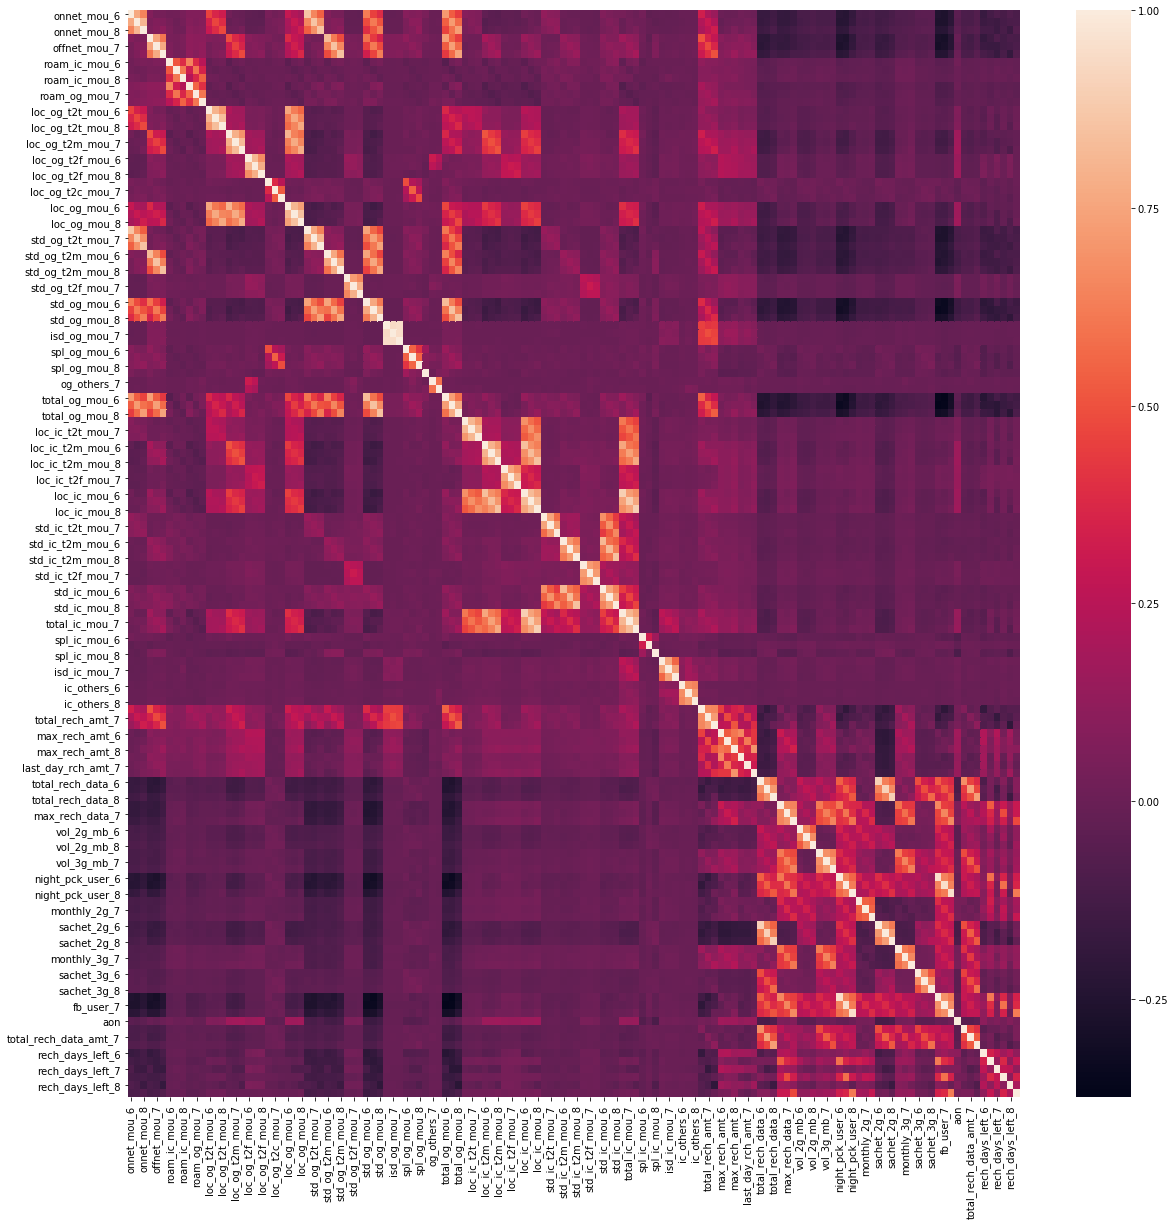

In [80]:
telecom3 = telecom2.drop(['mobile_number', 'churn'], axis=1)

# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(telecom3.corr())

In [81]:
# Create correlation matrix
corr_matrix = telecom3.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

print(to_drop)

# Drop features 
telecom3 = telecom3.drop(set(to_drop), axis=1)

['onnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


In [82]:
telecom3.shape

(28504, 100)

In [ ]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(telecom3.corr())

In [ ]:
# Putting feature variable to X
X = telecom3

# Putting response variable to y
y = telecom2['churn']

tel = pd.concat([X, y], axis=1)

tel.head()


In [ ]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

from sklearn import preprocessing

tel1 = preprocessing.StandardScaler().fit(tel)

tel1T = tel1.transform(tel)

tel1T_df = pd.DataFrame(tel1T,columns=tel.columns)

tel1T_df.head()

# Putting feature variable to X
X = tel1T_df.drop(['churn'], axis=1)

# Putting response variable to y
y = tel1T_df['churn']

from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

#Doing the PCA on the train data
pca.fit(X_train)

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [ ]:
df_train_pca = pca.fit_transform(X_train)
print(df_train_pca.shape)

df_test_pca = pca.transform(X_test)
print(df_test_pca.shape)

In [ ]:
from sklearn import datasets, linear_model, model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# 2. Create (or instantiate) an object of the model you want to build, e.g.
lr = LinearRegression()

# 3. Fit the model using the training data 
lr.fit(df_train_pca, y_train)

# 4. Predict the labels using the test data X_test
y_pred = lr.predict(df_test_pca)


# 5. Evaluate the model using an appropriate metric by comparing y_test and y_predicted
r_squared = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

print(mse)

print(r_squared)

# <font color='blue'>SUMMARY: DATA CLEANING</font>

